In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [3]:
#importação das planilhas csv para serem dataframes
df100 = pd.read_csv("dataset_sudeste_realista_outliers-100.csv")
df1000 = pd.read_csv("dataset_sudeste_realista_outliers-1K.csv")
df2000 = pd.read_csv("dataset_sudeste_realista_outliers-2K.csv")

In [4]:
df100.columns.tolist() #listar colunas de tabela de 100 linhas
df1000.columns.tolist() #listar colunas de tabela de 1000 linhas
df2000.columns.tolist() #listar colunas de tabela de 2000 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [5]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df100['idade'] = df100['idade'].fillna(0)
df100['renda'] = df100['renda'].fillna(0)
df100['cidade'] = df100['cidade'].fillna(0)
df100['categoria'] = df100['categoria'].fillna(0)
df100['nota'] = df100['nota'].fillna(0)
df100['feedback'] = df100['feedback'].fillna(0)

# Tratamento de NaN(nulos) - converter para 0 - tabela de 1000 linhas
df1000['idade'] = df1000['idade'].fillna(0)
df1000['renda'] = df1000['renda'].fillna(0)
df1000['cidade'] = df1000['cidade'].fillna(0)
df1000['categoria'] = df1000['categoria'].fillna(0)
df1000['nota'] = df1000['nota'].fillna(0)
df1000['feedback'] = df1000['feedback'].fillna(0)

# Tratamento de NaN(nulos) - converter para 0 - tabela de 2000 linhas
df2000['idade'] = df2000['idade'].fillna(0)
df2000['renda'] = df2000['renda'].fillna(0)
df2000['cidade'] = df2000['cidade'].fillna(0)
df2000['categoria'] = df2000['categoria'].fillna(0)
df2000['nota'] = df2000['nota'].fillna(0)
df2000['feedback'] = df2000['feedback'].fillna(0)

In [6]:
#feedbackisualização de tabela tratada de 100 linhas
display(df100.head(100))

#feedbackisualização de tabela tratada de 1000 linhas
display(df1000.head(1000))

#feedbackisualização de tabela tratada de 2000 linhas
display(df2000.head(2000))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,57.0,22701.87,Rio de Janeiro,A,6.8,Bom
1,2,45.0,3820.44,Belo Horizonte,B,5.6,Bom
2,3,31.0,5606.17,Belo Horizonte,A,9.1,Bom
3,4,70.0,16354.61,Belo Horizonte,A,6.5,Bom
4,5,68.0,9418.66,Belo Horizonte,A,6.5,Bom
...,...,...,...,...,...,...,...
95,96,37.0,29868.68,São Paulo,A,8.2,Bom
96,97,54.0,13883.32,São Paulo,B,8.9,Bom
97,98,41.0,39972.51,Vitória,A,8.3,Bom
98,99,16.0,15611.64,Belo Horizonte,A,7.6,Bom


,id,idade,renda,cidade,categoria,nota,feedback
0,1,33.0,23998.60,São Paulo,B,5.4,Bom
1,2,30.0,32347.35,Vitória,A,7.3,Bom
2,3,27.0,19521.96,São Paulo,B,6.2,Bom
3,4,54.0,3828.07,Vitória,A,6.3,Bom
4,5,61.0,39322.37,Vitória,A,5.9,Bom
...,...,...,...,...,...,...,...
995,996,72.0,43941.58,São Paulo,A,8.5,Bom
996,997,62.0,13561.95,Rio de Janeiro,A,5.5,Bom
997,998,68.0,46246.25,São Paulo,A,7.0,Bom
998,999,17.0,21589.09,São Paulo,A,8.9,Bom


,id,idade,renda,cidade,categoria,nota,feedback
0,1,46.0,43823.49,Rio de Janeiro,B,8.3,Bom
1,2,67.0,41856.80,Belo Horizonte,B,8.8,Bom
2,3,57.0,34728.65,São Paulo,B,7.0,Bom
3,4,64.0,44148.91,Belo Horizonte,A,7.0,Bom
4,5,31.0,8653.46,Rio de Janeiro,B,7.6,Bom
...,...,...,...,...,...,...,...
1995,1996,63.0,33570.70,São Paulo,A,6.0,Bom
1996,1997,47.0,22572.93,Vitória,A,7.0,Bom
1997,1998,80.0,13016.05,Rio de Janeiro,B,5.1,Bom
1998,1999,34.0,31325.10,Vitória,B,5.2,Bom


In [7]:
# Média, mínimo, máximo, quartis, margem de erro, contagem

print("\n### Descrição Estatística 100###")
print(df100.describe())
print("\n\n")

print("\n### Descrição Estatística 1000###")
print(df1000.describe())
print("\n\n")

print("\n### Descrição Estatística 2000###")
print(df2000.describe())
print("\n\n")


### Descrição Estatística 100###
               id       idade         renda        nota
count  100.000000  100.000000    100.000000  100.000000
mean    50.500000   42.440000  23898.598900    7.127000
std     29.011492   19.715307  12341.523723    1.759468
min      1.000000    0.000000      0.000000    0.000000
25%     25.750000   29.500000  14078.680000    5.800000
50%     50.500000   40.500000  24566.290000    7.100000
75%     75.250000   58.250000  33915.855000    8.400000
max    100.000000   80.000000  46099.970000    9.900000




### Descrição Estatística 1000###
                id        idade         renda         nota
count  1000.000000  1000.000000   1000.000000  1000.000000
mean    500.500000    48.834000  24237.116310     7.312200
std     288.819436    20.440309  13627.657493     1.762401
min       1.000000     0.000000      0.000000     0.000000
25%     250.750000    32.000000  13020.792500     6.100000
50%     500.500000    48.500000  24391.645000     7.400000
75%     750

In [8]:
# Cálculos Estatísticos de idade

media_idade100 = sum(df100['idade'])/len(df100['idade'])
mediana_idade100 = df100['idade'].median()
desvio_padrao_idade100 = df100['idade'].std()
maximo_idade100 = df100['idade'].max()
minimo_idade100 = df100['idade'].min()

print('Média de Idade - 100 Elementos:',round(media_idade100,0))
print('Mediana de Idade - 100 Elementos:',round(mediana_idade100,0))
print('Desvio Padrão de Idade - 100 Elementos:',round(desvio_padrao_idade100,0))
print('Maior Valor de Idade - 100 Elementos:',round(maximo_idade100,0))
print('Menor Valor de Idade - 100 Elementos:',round(minimo_idade100,0))
print('\n')

media_idade1000 = sum(df1000['idade'])/len(df1000['idade'])
mediana_idade1000 = df1000['idade'].median()
desvio_padrao_idade1000 = df1000['idade'].std()
maximo_idade1000 = df1000['idade'].max()
minimo_idade1000 = df1000['idade'].min()

print('Média de Idade - 1000 Elementos:',round(media_idade1000,0))
print('Mediana de Idade - 1000 Elementos:',round(mediana_idade1000,0))
print('Desvio Padrão de Idade - 1000 Elementos:',round(desvio_padrao_idade1000,0))
print('Maior Valor de Idade - 1000 Elementos:',round(maximo_idade1000,0))
print('Menor Valor de Idade - 1000 Elementos:',round(minimo_idade1000,0))
print('\n')

media_idade2000 = sum(df2000['idade'])/len(df2000['idade'])
mediana_idade2000 = df2000['idade'].median()
desvio_padrao_idade2000 = df2000['idade'].std()
maximo_idade2000 = df2000['idade'].max()
minimo_idade2000 = df2000['idade'].min()

print('Média de Idade - 2000 Elementos:',round(media_idade2000,0))
print('Mediana de Idade - 2000 Elementos:',round(mediana_idade2000,0))
print('Desvio Padrão de Idade - 2000 Elementos:',round(desvio_padrao_idade2000,0))
print('Maior Valor de Idade - 2000 Elementos:',round(maximo_idade2000,0))
print('Menor Valor de Idade - 2000 Elementos:',round(minimo_idade2000,0))
print('\n')

Média de Idade - 100 Elementos: 42.0
Mediana de Idade - 100 Elementos: 40.0
Desvio Padrão de Idade - 100 Elementos: 20.0
Maior Valor de Idade - 100 Elementos: 80.0
Menor Valor de Idade - 100 Elementos: 0.0


Média de Idade - 1000 Elementos: 49.0
Mediana de Idade - 1000 Elementos: 48.0
Desvio Padrão de Idade - 1000 Elementos: 20.0
Maior Valor de Idade - 1000 Elementos: 119.0
Menor Valor de Idade - 1000 Elementos: 0.0


Média de Idade - 2000 Elementos: 49.0
Mediana de Idade - 2000 Elementos: 49.0
Desvio Padrão de Idade - 2000 Elementos: 20.0
Maior Valor de Idade - 2000 Elementos: 117.0
Menor Valor de Idade - 2000 Elementos: 0.0




In [9]:
# Cálculos Estatísticos de renda

media_renda100 = sum(df100['renda'])/len(df100['renda'])
mediana_renda100 = df100['renda'].median()
desvio_padrao_renda100 = df100['renda'].std()
maximo_renda100 = df100['renda'].max()
minimo_renda100 = df100['renda'].min()

print('Média de Renda - 100 Elementos:',round(media_renda100,2))
print('Mediana de Renda - 100 Elementos:',round(mediana_renda100,2))
print('Desvio Padrão de Renda - 100 Elementos:',round(desvio_padrao_renda100,2))
print('Maior Valor de Renda - 100 Elementos:',round(maximo_renda100,2))
print('Menor Valor de Renda - 100 Elementos:',round(minimo_renda100,2))
print('\n')

media_renda1000 = sum(df1000['renda'])/len(df1000['renda'])
mediana_renda1000 = df1000['renda'].median()
desvio_padrao_renda1000 = df1000['renda'].std()
maximo_renda1000 = df1000['renda'].max()
minimo_renda1000 = df1000['renda'].min()

print('Média de Renda - 1000 Elementos:',round(media_renda1000,2))
print('Mediana de Renda - 1000 Elementos:',round(mediana_renda1000,2))
print('Desvio Padrão de Renda - 1000 Elementos:',round(desvio_padrao_renda1000,2))
print('Maior Valor de Renda - 1000 Elementos:',round(maximo_renda1000,2))
print('Menor Valor de Renda - 1000 Elementos:',round(minimo_renda1000,2))
print('\n')

media_renda2000 = sum(df2000['renda'])/len(df2000['renda'])
mediana_renda2000 = df2000['renda'].median()
desvio_padrao_renda2000 = df2000['renda'].std()
maximo_renda2000 = df2000['renda'].max()
minimo_renda2000 = df2000['renda'].min()

print('Média de Renda - 2000 Elementos:',round(media_renda2000,2))
print('Mediana de Renda - 2000 Elementos:',round(mediana_renda2000,2))
print('Desvio Padrão de Renda - 2000 Elementos:',round(desvio_padrao_renda2000,2))
print('Maior Valor de Renda - 2000 Elementos:',round(maximo_renda2000,2))
print('Menor Valor de Renda - 2000 Elementos:',round(minimo_renda2000,2))
print('\n')

Média de Renda - 100 Elementos: 23898.6
Mediana de Renda - 100 Elementos: 24566.29
Desvio Padrão de Renda - 100 Elementos: 12341.52
Maior Valor de Renda - 100 Elementos: 46099.97
Menor Valor de Renda - 100 Elementos: 0.0


Média de Renda - 1000 Elementos: 24237.12
Mediana de Renda - 1000 Elementos: 24391.64
Desvio Padrão de Renda - 1000 Elementos: 13627.66
Maior Valor de Renda - 1000 Elementos: 89526.57
Menor Valor de Renda - 1000 Elementos: 0.0


Média de Renda - 2000 Elementos: 24001.25
Mediana de Renda - 2000 Elementos: 23659.19
Desvio Padrão de Renda - 2000 Elementos: 13598.05
Maior Valor de Renda - 2000 Elementos: 86097.05
Menor Valor de Renda - 2000 Elementos: 0.0




In [10]:
# Cálculos Estatísticos de nota

media_nota100 = sum(df100['nota'])/len(df100['nota'])
mediana_nota100 = df100['nota'].median()
desvio_padrao_nota100 = df100['nota'].std()
maximo_nota100 = df100['nota'].max()
minimo_nota100 = df100['nota'].min()

print('Média de Nota - 100 Elementos:',round(media_nota100,2))
print('Mediana de Nota - 100 Elementos:',round(mediana_nota100,2))
print('Desvio Padrão de Nota - 100 Elementos:',round(desvio_padrao_nota100,2))
print('Maior Valor de Nota - 100 Elementos:',round(maximo_nota100,2))
print('Menor Valor de Nota - 100 Elementos:',round(minimo_nota100,2))
print('\n')

media_nota1000 = sum(df1000['nota'])/len(df1000['nota'])
mediana_nota1000 = df1000['nota'].median()
desvio_padrao_nota1000 = df1000['nota'].std()
maximo_nota1000 = df1000['nota'].max()
minimo_nota1000 = df1000['nota'].min()

print('Média de Nota - 1000 Elementos:',round(media_nota1000,2))
print('Mediana de Nota - 1000 Elementos:',round(mediana_nota1000,2))
print('Desvio Padrão de Nota - 1000 Elementos:',round(desvio_padrao_nota1000,2))
print('Maior Valor de Nota - 1000 Elementos:',round(maximo_nota1000,2))
print('Menor Valor de Nota - 1000 Elementos:',round(minimo_nota1000,2))
print('\n')

media_nota2000 = sum(df2000['nota'])/len(df2000['nota'])
mediana_nota2000 = df2000['nota'].median()
desvio_padrao_nota2000 = df2000['nota'].std()
maximo_nota2000 = df2000['nota'].max()
minimo_nota2000 = df2000['nota'].min()

print('Média de Nota - 2000 Elementos:',round(media_nota2000,2))
print('Mediana de Nota - 2000 Elementos:',round(mediana_nota2000,2))
print('Desvio Padrão de Nota - 2000 Elementos:',round(desvio_padrao_nota2000,2))
print('Maior Valor de Nota - 2000 Elementos:',round(maximo_nota2000,2))
print('Menor Valor de Nota - 2000 Elementos:',round(minimo_nota2000,2))
print('\n')

Média de Nota - 100 Elementos: 7.13
Mediana de Nota - 100 Elementos: 7.1
Desvio Padrão de Nota - 100 Elementos: 1.76
Maior Valor de Nota - 100 Elementos: 9.9
Menor Valor de Nota - 100 Elementos: 0.0


Média de Nota - 1000 Elementos: 7.31
Mediana de Nota - 1000 Elementos: 7.4
Desvio Padrão de Nota - 1000 Elementos: 1.76
Maior Valor de Nota - 1000 Elementos: 10.0
Menor Valor de Nota - 1000 Elementos: 0.0


Média de Nota - 2000 Elementos: 7.37
Mediana de Nota - 2000 Elementos: 7.5
Desvio Padrão de Nota - 2000 Elementos: 1.65
Maior Valor de Nota - 2000 Elementos: 10.0
Menor Valor de Nota - 2000 Elementos: 0.0




In [11]:
#Calculando o IQR e identificando os limites - Renda

Q1_renda100 = df100['renda'].quantile(0.25)
Q3_renda100 = df100['renda'].quantile(0.75)
IQR_renda100 = Q3_renda100 - Q1_renda100
limite_inferior_renda100 = Q1_renda100 - 1.5 * IQR_renda100
limite_superior_renda100 = Q3_renda100 + 1.5 * IQR_renda100

print (f"\n\n\t IQR - Campo Renda - 100\n\n")
print(f"Quartis -> Q1: {Q1_renda100:-8.2f}  ->  Q3: {Q3_renda100:-8.2f}")
print(f"IQR ----- {IQR_renda100}")
print(f"Limites - Inf: {limite_inferior_renda100:-8.2f}  -> Sup: {limite_superior_renda100:-8.2f}")
print(f"\n\n")

Q1_renda1000 = df1000['renda'].quantile(0.25)
Q3_renda1000 = df1000['renda'].quantile(0.75)
IQR_renda1000 = Q3_renda1000 - Q1_renda1000
limite_inferior_renda1000 = Q1_renda1000 - 1.5 * IQR_renda1000
limite_superior_renda1000 = Q3_renda1000 + 1.5 * IQR_renda1000

print (f"\n\n\t IQR - Campo Renda - 1000\n\n")
print(f"Quartis -> Q1: {Q1_renda1000:-8.2f}  ->  Q3: {Q3_renda1000:-8.2f}")
print(f"IQR ----- {IQR_renda1000}")
print(f"Limites - Inf: {limite_inferior_renda1000:-8.2f}  -> Sup: {limite_superior_renda1000:-8.2f}")
print(f"\n\n")

Q1_renda2000 = df2000['renda'].quantile(0.25)
Q3_renda2000 = df2000['renda'].quantile(0.75)
IQR_renda2000 = Q3_renda2000 - Q1_renda2000
limite_inferior_renda2000 = Q1_renda2000 - 1.5 * IQR_renda2000
limite_superior_renda2000 = Q3_renda2000 + 1.5 * IQR_renda2000

print (f"\n\n\t IQR - Campo Renda - 2000\n\n")
print(f"Quartis -> Q1: {Q1_renda2000:-8.2f}  ->  Q3: {Q3_renda2000:-8.2f}")
print(f"IQR ----- {IQR_renda2000}")
print(f"Limites - Inf: {limite_inferior_renda2000:-8.2f}  -> Sup: {limite_superior_renda2000:-8.2f}")
print(f"\n\n")



	 IQR - Campo Renda - 100


Quartis -> Q1: 14078.68  ->  Q3: 33915.85
IQR ----- 19837.174999999996
Limites - Inf: -15677.08  -> Sup: 63671.62





	 IQR - Campo Renda - 1000


Quartis -> Q1: 13020.79  ->  Q3: 35389.78
IQR ----- 22368.99
Limites - Inf: -20532.69  -> Sup: 68943.27





	 IQR - Campo Renda - 2000


Quartis -> Q1: 12367.72  ->  Q3: 35758.90
IQR ----- 23391.1775
Limites - Inf: -22719.04  -> Sup: 70845.67





In [12]:
#Calculando o IQR e identificando os limites - Idade

Q1_idade100 = df100['idade'].quantile(0.25)
Q3_idade100 = df100['idade'].quantile(0.75)
IQR_idade100 = Q3_idade100 - Q1_idade100
limite_inferior_idade100 = Q1_idade100 - 1.5 * IQR_idade100
limite_superior_idade100 = Q3_idade100 + 1.5 * IQR_idade100

print (f"\n\n\t IQR - Campo Idade - 100\n\n")
print(f"Quartis -> Q1: {Q1_idade100:-8.2f}  ->  Q3: {Q3_idade100:-8.2f}")
print(f"IQR ----- {IQR_idade100}")
print(f"Limites - Inf: {limite_inferior_idade100:-8.2f}  -> Sup: {limite_superior_idade100:-8.2f}")
print(f"\n\n")

Q1_idade1000 = df1000['idade'].quantile(0.25)
Q3_idade1000 = df1000['idade'].quantile(0.75)
IQR_idade1000 = Q3_idade1000 - Q1_idade1000
limite_inferior_idade1000 = Q1_idade1000 - 1.5 * IQR_idade1000
limite_superior_idade1000 = Q3_idade1000 + 1.5 * IQR_idade1000

print (f"\n\n\t IQR - Campo Idade - 1000\n\n")
print(f"Quartis -> Q1: {Q1_idade1000:-8.2f}  ->  Q3: {Q3_idade1000:-8.2f}")
print(f"IQR ----- {IQR_idade1000}")
print(f"Limites - Inf: {limite_inferior_idade1000:-8.2f}  -> Sup: {limite_superior_idade1000:-8.2f}")
print(f"\n\n")

Q1_idade2000 = df2000['idade'].quantile(0.25)
Q3_idade2000 = df2000['idade'].quantile(0.75)
IQR_idade2000 = Q3_idade2000 - Q1_idade2000
limite_inferior_idade2000 = Q1_idade2000 - 1.5 * IQR_idade2000
limite_superior_idade2000 = Q3_idade2000 + 1.5 * IQR_idade2000

print (f"\n\n\t IQR - Campo Idade - 2000\n\n")
print(f"Quartis -> Q1: {Q1_idade2000:-8.2f}  ->  Q3: {Q3_idade2000:-8.2f}")
print(f"IQR ----- {IQR_idade2000}")
print(f"Limites - Inf: {limite_inferior_idade2000:-8.2f}  -> Sup: {limite_superior_idade2000:-8.2f}")
print(f"\n\n")



	 IQR - Campo Idade - 100


Quartis -> Q1:    29.50  ->  Q3:    58.25
IQR ----- 28.75
Limites - Inf:   -13.62  -> Sup:   101.38





	 IQR - Campo Idade - 1000


Quartis -> Q1:    32.00  ->  Q3:    66.00
IQR ----- 34.0
Limites - Inf:   -19.00  -> Sup:   117.00





	 IQR - Campo Idade - 2000


Quartis -> Q1:    33.00  ->  Q3:    66.00
IQR ----- 33.0
Limites - Inf:   -16.50  -> Sup:   115.50





In [13]:
#Calculando o IQR e identificando os limites - Nota

Q1_nota100 = df100['nota'].quantile(0.25)
Q3_nota100 = df100['nota'].quantile(0.75)
IQR_nota100 = Q3_nota100 - Q1_nota100
limite_inferior_nota100 = Q1_nota100 - 1.5 * IQR_nota100
limite_superior_nota100 = Q3_nota100 + 1.5 * IQR_nota100

print (f"\n\n\t IQR - Campo Nota - 100\n\n")
print(f"Quartis -> Q1: {Q1_nota100:-8.2f}  ->  Q3: {Q3_nota100:-8.2f}")
print(f"IQR ----- {IQR_nota100}")
print(f"Limites - Inf: {limite_inferior_nota100:-8.2f}  -> Sup: {limite_superior_nota100:-8.2f}")
print(f"\n\n")

Q1_nota1000 = df1000['nota'].quantile(0.25)
Q3_nota1000 = df1000['nota'].quantile(0.75)
IQR_nota1000 = Q3_nota1000 - Q1_nota1000
limite_inferior_nota1000 = Q1_nota1000 - 1.5 * IQR_nota1000
limite_superior_nota1000 = Q3_nota1000 + 1.5 * IQR_nota1000

print (f"\n\n\t IQR - Campo Nota - 1000\n\n")
print(f"Quartis -> Q1: {Q1_nota1000:-8.2f}  ->  Q3: {Q3_nota1000:-8.2f}")
print(f"IQR ----- {IQR_nota1000}")
print(f"Limites - Inf: {limite_inferior_nota1000:-8.2f}  -> Sup: {limite_superior_nota1000:-8.2f}")
print(f"\n\n")

Q1_nota2000 = df2000['nota'].quantile(0.25)
Q3_nota2000 = df2000['nota'].quantile(0.75)
IQR_nota2000 = Q3_nota2000 - Q1_nota2000
limite_inferior_nota2000 = Q1_nota2000 - 1.5 * IQR_nota2000
limite_superior_nota2000 = Q3_nota2000 + 1.5 * IQR_nota2000

print (f"\n\n\t IQR - Campo Nota - 2000\n\n")
print(f"Quartis -> Q1: {Q1_nota2000:-8.2f}  ->  Q3: {Q3_nota2000:-8.2f}")
print(f"IQR ----- {IQR_nota2000}")
print(f"Limites - Inf: {limite_inferior_nota2000:-8.2f}  -> Sup: {limite_superior_nota2000:-8.2f}")
print(f"\n\n")



	 IQR - Campo Nota - 100


Quartis -> Q1:     5.80  ->  Q3:     8.40
IQR ----- 2.6000000000000005
Limites - Inf:     1.90  -> Sup:    12.30





	 IQR - Campo Nota - 1000


Quartis -> Q1:     6.10  ->  Q3:     8.70
IQR ----- 2.5999999999999996
Limites - Inf:     2.20  -> Sup:    12.60





	 IQR - Campo Nota - 2000


Quartis -> Q1:     6.10  ->  Q3:     8.70
IQR ----- 2.5999999999999996
Limites - Inf:     2.20  -> Sup:    12.60





In [14]:
#Outliers Renda

outliers_renda100 = df100[(df100['renda'] < limite_inferior_renda100) | (df100['renda'] > limite_superior_renda100)]
print(f"\n### Possíveis Outliers em 'renda' - 100 Elementos###\n\n{outliers_renda100}\n\n\n")

outliers_renda1000 = df1000[(df1000['renda'] < limite_inferior_renda1000) | (df1000['renda'] > limite_superior_renda1000)]
print(f"\n### Possíveis Outliers em 'renda' - 1000 Elementos###\n\n{outliers_renda1000}\n\n\n")

outliers_renda2000 = df2000[(df2000['renda'] < limite_inferior_renda2000) | (df2000['renda'] > limite_superior_renda2000)]
print(f"\n### Possíveis Outliers em 'renda' - 2000 Elementos###\n\n{outliers_renda2000}\n\n\n")


### Possíveis Outliers em 'renda' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'renda' - 1000 Elementos###

      id  idade     renda     cidade categoria  nota feedback
27    28   83.0  78193.38  São Paulo         A   1.0      Bom
475  476   89.0  77512.53  São Paulo         A   2.3      Bom
540  541    2.0  84166.00  São Paulo         A   4.7      Bom
742  743  107.0  89526.57  São Paulo         A   3.2      Bom




### Possíveis Outliers em 'renda' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
1234  1235    4.0  85664.95  Belo Horizonte         A   4.0      Bom
1280  1281  116.0  85657.73  Rio de Janeiro         A   0.7      Bom
1559  1560   90.0  77492.00               0         A   4.6      Bom
1699  1700   84.0  71645.50         Vitória         A   2.9      Bom
1885  1886   97.0  86097.05  Rio de Janeiro         A   3.6      Bom





In [15]:
#Outliers Idade

outliers_idade100 = df100[(df100['idade'] < limite_inferior_idade100) | (df100['idade'] > limite_superior_idade100)]
print(f"\n### Possíveis Outliers em 'idade' - 100 Elementos###\n\n{outliers_idade100}\n\n\n")

outliers_idade1000 = df1000[(df1000['idade'] < limite_inferior_idade1000) | (df1000['idade'] > limite_superior_idade1000)]
print(f"\n### Possíveis Outliers em 'idade' - 1000 Elementos###\n\n{outliers_idade1000}\n\n\n")

outliers_idade2000 = df2000[(df2000['idade'] < limite_inferior_idade2000) | (df2000['idade'] > limite_superior_idade2000)]
print(f"\n### Possíveis Outliers em 'idade' - 2000 Elementos###\n\n{outliers_idade2000}\n\n\n")


### Possíveis Outliers em 'idade' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'idade' - 1000 Elementos###

      id  idade    renda     cidade categoria  nota feedback
829  830  119.0  1139.86    Vitória         A   0.7      Bom
853  854  118.0   778.72  São Paulo         A   1.5      Bom




### Possíveis Outliers em 'idade' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
31      32  117.0    518.11  Rio de Janeiro         A   1.8      Bom
1280  1281  116.0  85657.73  Rio de Janeiro         A   0.7      Bom
1823  1824  116.0   1333.05  Belo Horizonte         A   2.2      Bom





In [16]:
#Outliers Nota

outliers_nota100 = df100[(df100['nota'] < limite_inferior_nota100) | (df100['nota'] > limite_superior_nota100)]
print(f"\n### Possíveis Outliers em 'nota' - 100 Elementos###\n\n{outliers_nota100}\n\n\n")

outliers_nota1000 = df1000[(df1000['nota'] < limite_inferior_nota1000) | (df1000['nota'] > limite_superior_nota1000)]
print(f"\n### Possíveis Outliers em 'nota' - 1000 Elementos###\n\n{outliers_nota1000}\n\n\n")

outliers_nota2000 = df2000[(df2000['nota'] < limite_inferior_nota2000) | (df2000['nota'] > limite_superior_nota2000)]
print(f"\n### Possíveis Outliers em 'nota' - 2000 Elementos###\n\n{outliers_nota2000}\n\n\n")


### Possíveis Outliers em 'nota' - 100 Elementos###

    id  idade     renda     cidade categoria  nota feedback
29  30   40.0  41768.46    Vitória         A   0.0        0
50  51   48.0   7812.34  São Paulo         A   0.0        0




### Possíveis Outliers em 'nota' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
13    14   68.0  20769.09       São Paulo         B   0.0        0
27    28   83.0  78193.38       São Paulo         A   1.0      Bom
46    47   22.0  30040.14  Rio de Janeiro         A   0.0        0
120  121   45.0  39322.34         Vitória         A   0.0        0
198  199   75.0  38457.64       São Paulo         B   0.0        0
201  202    8.0    459.89  Rio de Janeiro         A   0.4      Bom
230  231   52.0  43480.43  Rio de Janeiro         A   0.0        0
272  273   27.0  37421.66         Vitória         A   0.0        0
316  317   45.0  23263.48  Rio de Janeiro         A   0.0        0
369  370   43.0   5814.46       São Pa

In [17]:
#Conversão da planilha tratada para csv
df100.to_csv('Realista100_Tratado.csv', index=False)
df1000.to_csv('Realista1000_Tratado.csv', index=False)
df2000.to_csv('Realista2000_Tratado.csv', index=False)

In [18]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo100 = df100.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Realista100.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo100, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!


In [19]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo1000 = df1000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Realista1000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo1000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!


In [20]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo2000 = df2000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Realista2000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo2000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 2000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 2000 linhas!


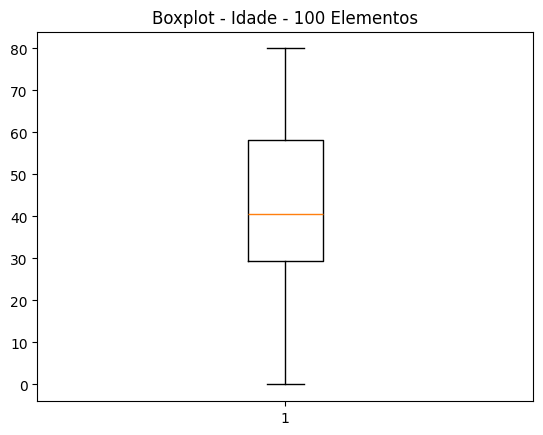

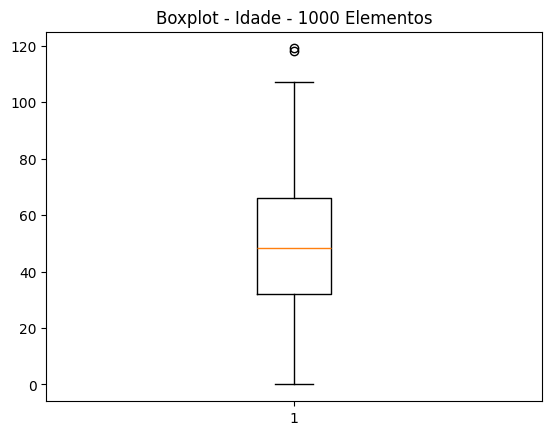

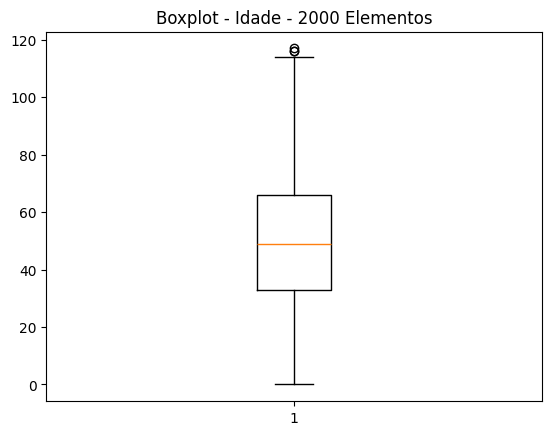

In [21]:
#Geração Gráfico - Idade - 100 linhas
plt.boxplot(df100['idade'])
plt.title("Boxplot - Idade - 100 Elementos")
plt.show()

#Geração Gráfico - Idade - 1000 linhas
plt.boxplot(df1000['idade'])
plt.title("Boxplot - Idade - 1000 Elementos")
plt.show()

#Geração Gráfico - Idade - 2000 linhas
plt.boxplot(df2000['idade'])
plt.title("Boxplot - Idade - 2000 Elementos")
plt.show()

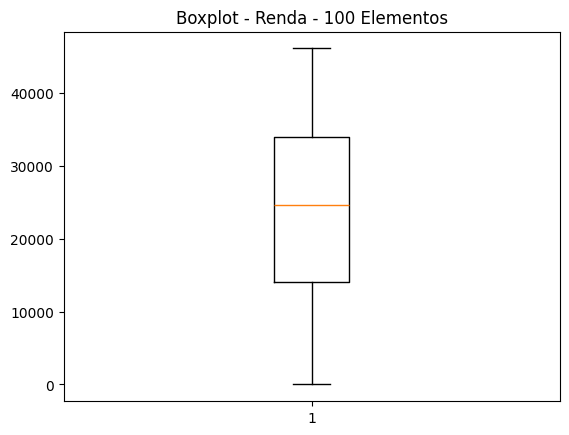

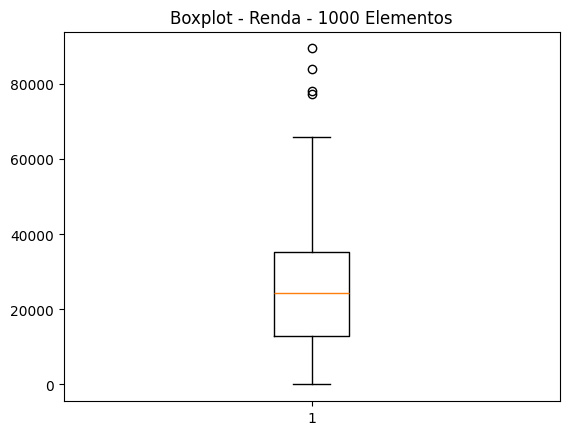

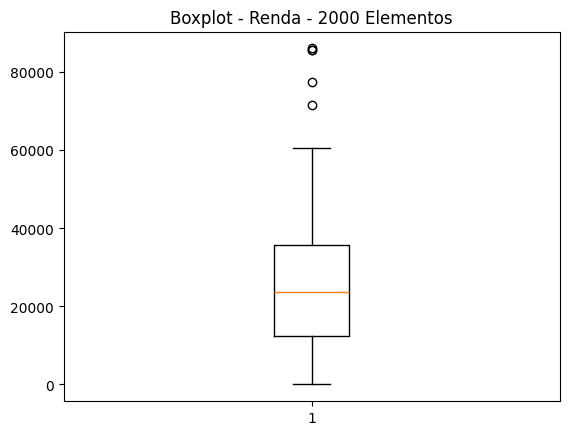

In [22]:
#Geração Gráfico - Renda - 100 linhas
plt.boxplot(df100['renda'])
plt.title("Boxplot - Renda - 100 Elementos")
plt.show()

#Geração Gráfico - Renda - 1000 linhas
plt.boxplot(df1000['renda'])
plt.title("Boxplot - Renda - 1000 Elementos")
plt.show()

#Geração Gráfico - Renda - 2000 linhas
plt.boxplot(df2000['renda'])
plt.title("Boxplot - Renda - 2000 Elementos")
plt.show()

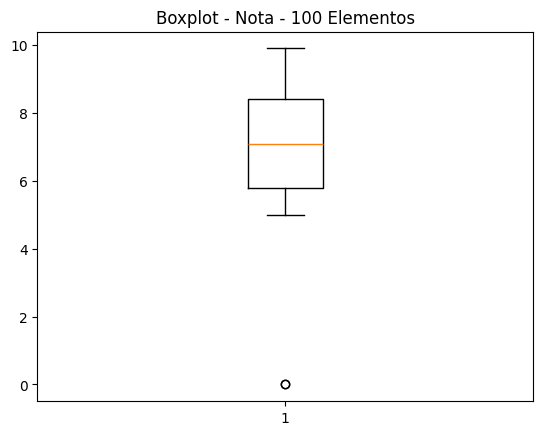

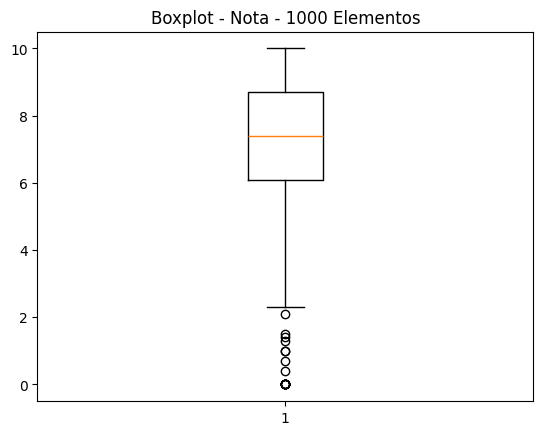

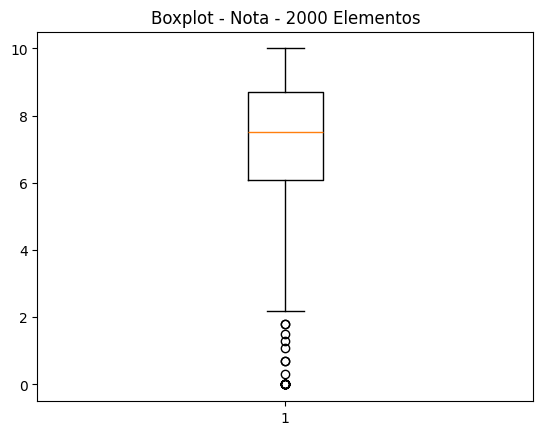

In [23]:
#Geração Gráfico - Nota - 100 linhas
plt.boxplot(df100['nota'])
plt.title("Boxplot - Nota - 100 Elementos")
plt.show()

#Geração Gráfico - Nota - 1000 linhas
plt.boxplot(df1000['nota'])
plt.title("Boxplot - Nota - 1000 Elementos")
plt.show()

#Geração Gráfico - Nota - 2000 linhas
plt.boxplot(df2000['nota'])
plt.title("Boxplot - Nota - 2000 Elementos")
plt.show()